# <b> Laboratório 2

Aluno: Rafael Mendes Campello

Referência: https://ecee.colorado.edu/~mathys/ecen4652/lab02/index.html

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import ModuleLab1
import ModuleLab2
from importlib import reload
from Resources import showfun_basic, comsig
reload(ModuleLab1)
reload(ModuleLab2)

<module 'ModuleLab2' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab2/ModuleLab2.py'>

# E1

## a

As mudanças feitas nesse letra na função $\texttt{showft}$ são equivalentes às funções $\texttt{np.fft.fftfreq()}$ e $\texttt{np.fft.fftshift()}$, em que associamos cada ponto à sua devida frequência (e refletimos o eixo para frequências negativas, se necessário).

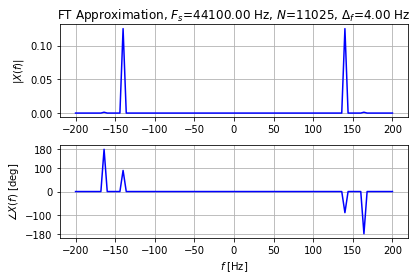

In [2]:
Fs = 44100
# Sampling rate
fa, fb = 140, 164
# Frequencies fa, fb
tlen = 0.25
# Length of t-axis in sec
tt = np.arange(round(Fs*tlen))/float(Fs) # Time axis
xt = np.sin(2*np.pi*fa*tt)-0.01*np.cos(2*np.pi*fb*tt)
# Linear combination of sinusoids
sig_xt = comsig.sigWave(xt, Fs, 0) # Waveform from class sigWave
nff, absXf, argXf = ModuleLab2.showft(sig_xt,[-200, 200, 1e-3]) # Display X(f), using ff_lim

Conforme sugerido, a área abaixo do "impulso" na figura acima possui área (usando fórmula de área de triângulo):

In [3]:
espacamento = np.diff(nff)[0]
print("Espaçamento: ", espacamento)
area = np.max(absXf) * (2 * espacamento) / 2
print("Area: ", area)

Espaçamento:  4.0
Area:  0.5


Que é o valor esperado, pois $F(x(t)) = \frac{1}{2}[\delta(f-f_1) + \delta(f+f_1)]$ (considerando $x(t)$ um cosseno, o valor absoluto da transformada é o mesmo para o caso do seno)

## b

In [4]:
reload(ModuleLab2)

<module 'ModuleLab2' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab2/ModuleLab2.py'>

A função showft é incrementada com as funcionalidades adicionais sugeridas: mascaramento e escala logarítmica.

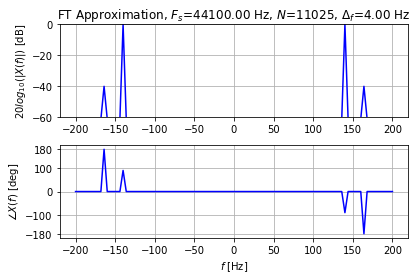

In [5]:
Fs = 44100
# Sampling rate
fa, fb = 140, 164
# Frequencies fa, fb
tlen = 0.25
# Length of t-axis in sec
tt = np.arange(round(Fs*tlen))/float(Fs) # Time axis
x2t = np.sin(2*np.pi*fa*tt)-0.01*np.cos(2*np.pi*fb*tt)
# Linear combination of sinusoids
sig_x2t = comsig.sigWave(x2t, Fs, 0) # Waveform from class sigWave
nff, absXf, argXf = ModuleLab2.showft(sig_x2t,[-200, 200, -60]) # Display X(f), using ff_lim

## c

In [6]:
reload(ModuleLab1)
reload(ModuleLab2)

<module 'ModuleLab2' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab2/ModuleLab2.py'>

Primeiro faremos um plot para uma transmissão PAM retangular usando uma mensagem binária aleatória.


Para um plot da fase mais coerente devemos ter cuidado com a definição do sinal e dos instantes de tempo (simétrico em torno do zero). O plot para apenas o pulso retangular simétrico em torno do 0 é feito em seguida, conforme pedido na descrição da atividade.

In [7]:
MSG_SIZE = 10
# msg = np.random.randint(0, 2, size = MSG_SIZE, dtype = np.uint8)
msg = [0, 1, 1, 0, 0, 1, 1, 0]

O tamanho do vetor st (PAM) transmitido é: MSG_SIZE $\cdot \frac{f_S}{f_B}$, e o espaçamento $\Delta_f = \frac{f_S}{N} = \frac{f_B}{\texttt{MSG_SIZE}}$, logo escolhemos $\texttt{MSG_SIZE} = 10$

In [8]:
fs = 44100
tt, st = ModuleLab1.ftpam_bitstring(msg, Fb = 100, Fs = fs)

In [9]:
st.size

3528

In [10]:
fs / st.size

12.5

Ajustando o eixo do tempo para ser simétrico em torno de zero

In [11]:
tt = np.linspace(-((tt[-1] - tt[0]) / 2), (tt[-1] - tt[0]) / 2, st.size)

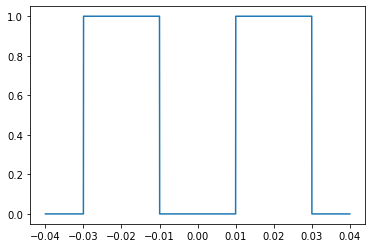

In [12]:
plt.plot(tt, st)

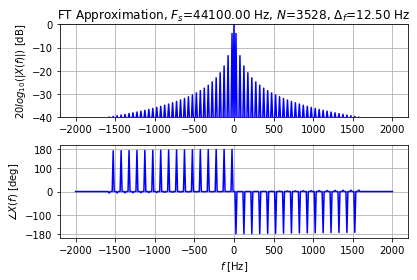

In [13]:
sig_x3t = comsig.sigWave(st, fs, tt[0]) # simetria
nff, absXf, argXf = ModuleLab2.showft(sig_x3t, [-2000, 2000, -40]) # Display X(f), using ff_lim

Outra opção é o plot da transformada de $p(t)$ retangular (conforme pedido), que tem fase melhor comportada e não depende tanto dos parâmetros escolhidos acima (como a própria mensagem transmitida).

-0.05 0.05


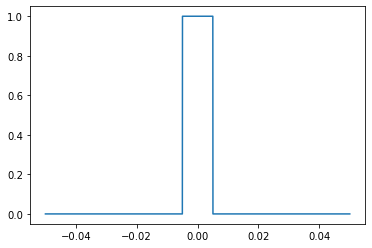

In [14]:
# é recomendável uma superamostragem do sinal para ter precisão na fase
TOTAL_N = 9000
tt = np.arange(- TOTAL_N // 2, TOTAL_N // 2 + 1, dtype=np.float32)
Fs = 10 * TOTAL_N
tt /= Fs
st = np.zeros(tt.size)
for i in range(tt.size):
    if tt[i] >= -0.005 and tt[i] < 0.005:
        st[i] = 1

plt.plot(tt, st)
print(tt[0], tt[-1])

In [15]:
reload(ModuleLab1)
reload(ModuleLab2)

<module 'ModuleLab2' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab2/ModuleLab2.py'>

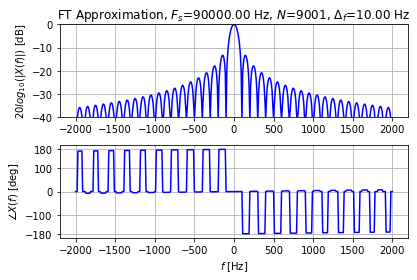

In [16]:
sig_x3t = comsig.sigWave(st, Fs, tt[0]) # Waveform from class sigWave
nff, absXf, argXf = ModuleLab2.showft(sig_x3t, [-2000, 2000, -40]) # Display X(f), using ff_lim

Fazendo um gráfico com a magnitude e a fase, pode-se perceber que cada lóbulo (que corresponde a um lóbulo do sinc) possui defasagem de fase de 180 $^\circ$ com relação ao lóbulo anterior (correspondendo aos cruzamentos com o zero do sinc). Isso é esperado, já que a transformada do sinal real simétrico com relação ao zero tem de ser inteiramente real, ou seja sua fase é 0, 180 $^\circ$ ou -180 $^\circ$.

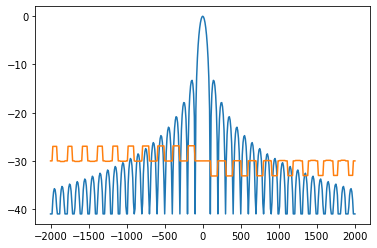

In [17]:
plt.plot(nff, absXf)
plt.plot(nff, argXf-30)

In [18]:
# qual a frequência do pico de maior valor absoluto? (confirmar que o gráfico está centrado)
nff[np.argmax(absXf)]

0.0

# E2

## a

In [19]:
reload(ModuleLab1)
reload(ModuleLab2)

<module 'ModuleLab2' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab2/ModuleLab2.py'>

Precisamos incrementar a função dada $\texttt{ftpam10}$ considerando os pulsos $p(t)$ sinc e triangular.

Abaixo, fazemos os testes para os 3 exemplos dados com a string "Test"

In [20]:
string = "Test"
bit_sequence = ModuleLab1.asc2bin(string)

In [21]:
polar = 2 * bit_sequence - 1
polar = np.concatenate((np.zeros(2, ), polar, np.zeros(2,)))

In [22]:
Fs = 44100
Fb = 100
n0 = -2

In [23]:
ss = comsig.sigSequ(polar, FB=Fb, n0=n0)

Para $p(t)$ retangular

In [24]:
sig = ModuleLab2.pam10(ss, Fs = Fs, ptype="rect", pparms=[])
stt = np.array(np.round(Fs * (np.arange(0, len(ss)) + ss.get_n0()) / Fb), dtype=np.int32) - int(np.ceil(Fs * (ss.get_n0() - 0.5) / Fb))
stt = stt[2:-2]

Text(0.5, 1.0, "Polar Binary PAM for 'Test', $F_b$ = 100 Baud, Rectangular $p(t)$")

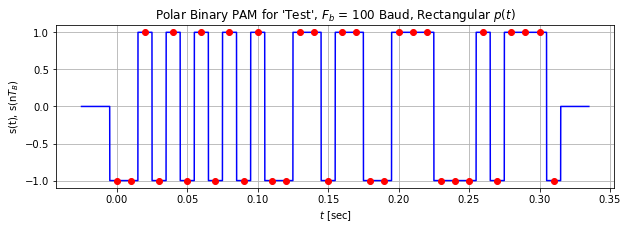

In [25]:
plt.figure(figsize=(10, 3))
plt.plot(sig.timeAxis(), sig.signal(), color = "blue")
plt.plot(sig.timeAxis()[stt], sig.signal()[stt], marker = "o", color = "red", linestyle="none")
plt.grid()
plt.xlabel(f"$t$ [sec]")
plt.ylabel(f"s(t), s(n$T_B$)")
plt.title(f"Polar Binary PAM for '{string}', $F_b$ = {Fb} Baud, Rectangular $p(t)$")

Para $p(t)$ triangular

In [26]:
sig = ModuleLab2.pam10(ss, Fs = Fs, ptype="tri", pparms=[])
stt = np.array(np.round(Fs * (np.arange(0, len(ss)) + ss.get_n0()) / Fb), dtype=np.int32) - int(np.ceil(Fs * (ss.get_n0() - 0.5) / Fb))
stt = stt[2:-2]

Text(0.5, 1.0, "Polar Binary PAM for 'Test', $F_b$ = 100 Baud, Triangular $p(t)$")

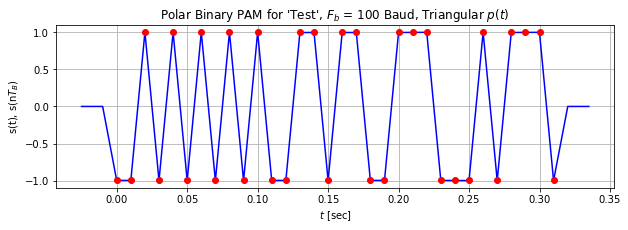

In [27]:
plt.figure(figsize=(10, 3))
plt.plot(sig.timeAxis(), sig.signal(), color = "blue")
plt.plot(sig.timeAxis()[stt], sig.signal()[stt], marker = "o", color = "red", linestyle="none")
plt.grid()
plt.xlabel(f"$t$ [sec]")
plt.ylabel(f"s(t), s(n$T_B$)")
plt.title(f"Polar Binary PAM for '{string}', $F_b$ = {Fb} Baud, Triangular $p(t)$")

Para $p(t)$ sinc

In [28]:
k = 10
beta = 4

sig = ModuleLab2.pam10(ss, Fs = Fs, ptype="sinc", pparms=[k, beta])
stt = np.array(np.round(Fs * (np.arange(0, len(ss)) + ss.get_n0()) / Fb), dtype=np.int32) - int(np.ceil(Fs * (ss.get_n0() - 0.5) / Fb))
stt = stt[2:-2]

Text(0.5, 1.0, "Polar Binary PAM for 'Test', $F_b$ = 100 Baud, 'sinc' $p(t)$, k = 10, beta = 4")

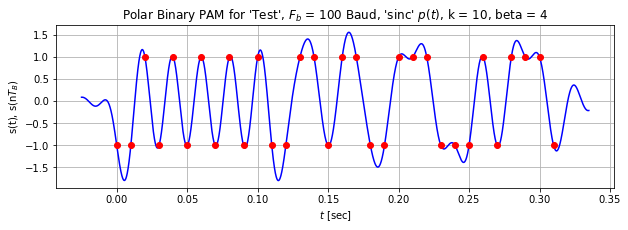

In [29]:
plt.figure(figsize=(10, 3))
plt.plot(sig.timeAxis(), sig.signal(), color = "blue")
plt.plot(sig.timeAxis()[stt], sig.signal()[stt], marker = "o", color = "red", linestyle="none")
plt.grid()
plt.xlabel(f"$t$ [sec]")
plt.ylabel(f"s(t), s(n$T_B$)")
plt.title(f"Polar Binary PAM for '{string}', $F_b$ = {Fb} Baud, 'sinc' $p(t)$, k = {k}, beta = {beta}")

## b

O procedimento é análogo ao da letra a, mas agora usamos as recomendações dadas para gerar os sinais e plots, nesta letra fazemos comparações dos espectros dos sinais PAM para cada $p(t)$.

In [30]:
Fb = 100
dn = np.random.rand(round(Fb/2.0)) #
dn = np.array(np.floor(2*dn),int)
an = 2*dn - 1
sig_an = comsig.sigSequ(an, Fb, 0) #

In [31]:
Fs = 44100

Para o pulso retangular

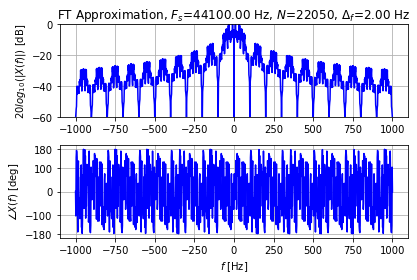

In [32]:
sig = ModuleLab2.pam10(sig_an, Fs = Fs, ptype="rect", pparms=[])
_, _, _ = ModuleLab2.showft(sig, ff_lim=[-1000, 1000, -60])

Para o pulso triangular

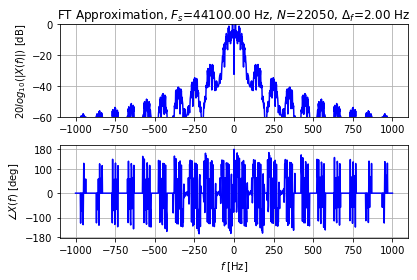

In [33]:
sig = ModuleLab2.pam10(sig_an, Fs = Fs, ptype="tri", pparms=[])
_, _, _ = ModuleLab2.showft(sig, ff_lim=[-1000, 1000, -60])

Para o pulso "sinc"

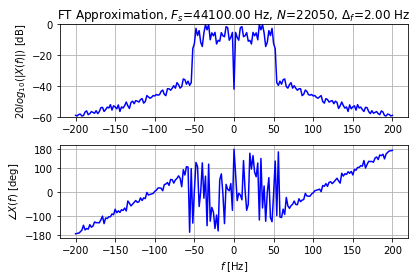

In [34]:
k = 10
beta = 2
sig = ModuleLab2.pam10(sig_an, Fs = Fs, ptype="sinc", pparms=[k, beta])
_, _, _ = ModuleLab2.showft(sig, ff_lim=[-200, 200, -60])

Os plots de magnitude deixam claro o efeito dos pulsos $p(t)$ nos espectros resultantes. Conforme esperado, o espectro do "sinc" é mais contido do que os outros dois.

O espectro do pulso retangular é o que mais espalha energia pelo espectro, tendo lóbulos secondários que concentram quantidades significativas de energia.

Para o pulso triangular, temos uma redução significativa da energia desses picos secundários (segundo PDF fornecido, nesse caso, o lóbulo principal concentra 99.7% da energia do pulso).

O "sinc" truncado é a forma de onda que é melhor limitada no espectro (pois é uma aproximação para um filtro passa-baixa no espectro).

# E3

## a

Para todos os sinais, faremos uma análise no tempo e na frequência para determinar qual o pulso utilizado (sabendo as características principais destes pela questão E2).

44100


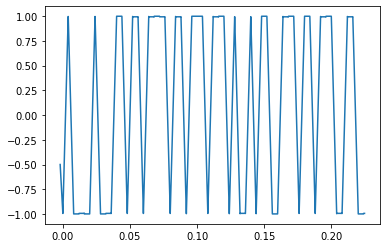

In [35]:
Fs, rt = ModuleLab1.wavread("Files/pamsig201.wav")
Fb = 250
Tb = 1 / Fb
sig_xt = comsig.sigWave(rt, Fs, -Tb / 2)
print(Fs)
sl = slice(0, 10000)
plt.plot(sig_xt.timeAxis()[sl], sig_xt.signal()[sl])

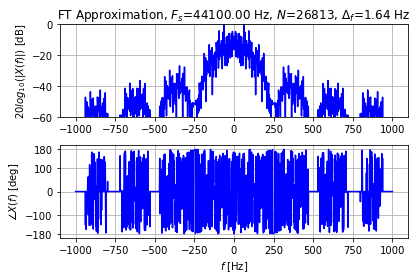

In [36]:
_, _, _ = ModuleLab2.showft(sig_xt, [-1000, 1000, -60])

Pelo plot do espectro, vemos que o sinal possui componente DC (não é o sinal especial indicado pela questão).

Pelo plot do tempo, vemos se tratar do pulso triangular.

Da questão E2A, sabemos que o espectro do pico central tem mínimo próximo a $F_b$, portanto usamos $F_b = 250Hz$.

Pelo tamanho do sinal recebido, descobrimos que o texto transmitido possui 19 caracteres.

In [37]:
n0 = 0 # não importa
len_sig_seq = 8 * 19
stt = np.array(np.round(Fs * (np.arange(0, len_sig_seq) + n0) / Fb), dtype=np.int32) - int(np.ceil(Fs * (n0 - 0.5) / Fb))

Text(0.5, 1.0, "Polar Binary PAM for 'Test', $F_b$ = 250 Baud, Triangular $p(t)$")

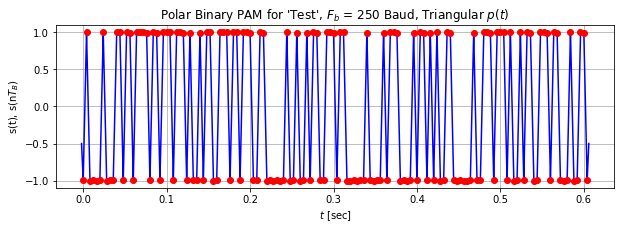

In [38]:
plt.figure(figsize=(10, 3))
plt.plot(sig_xt.timeAxis(), sig_xt.signal(), color = "blue")
plt.plot(sig_xt.timeAxis()[stt], sig_xt.signal()[stt], marker = "o", color = "red", linestyle="none")
plt.grid()
plt.xlabel(f"$t$ [sec]")
plt.ylabel(f"s(t), s(n$T_B$)")
plt.title(f"Polar Binary PAM for '{string}', $F_b$ = {Fb} Baud, Triangular $p(t)$")

In [39]:
dec1 = sig_xt.signal()[stt]

In [40]:
est_bit1 = (dec1 + 1) / 2
est_bit1 = np.round(est_bit1).astype(int)
print(est_bit1)

[0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0
 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1
 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1
 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0
 0 1 1 0]


In [41]:
ModuleLab1.bin2asc(est_bit1, bits = 8, flg = 0)

'Blowing in the wind'

Fazendo o mesmo para o segundo sinal:

44100


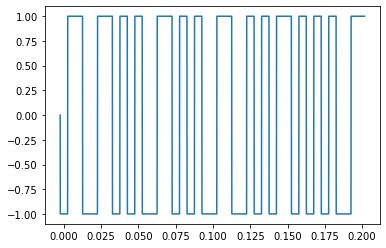

In [42]:
Fs, rt = ModuleLab1.wavread("Files/pamsig202.wav")
Fb = 200
Tb = 1 / Fb
sig_xt = comsig.sigWave(rt, Fs, -Tb / 2)
print(Fs)
sl = slice(0, 9000)
plt.plot(sig_xt.timeAxis()[sl], sig_xt.signal()[sl])

In [43]:
1/200

0.005

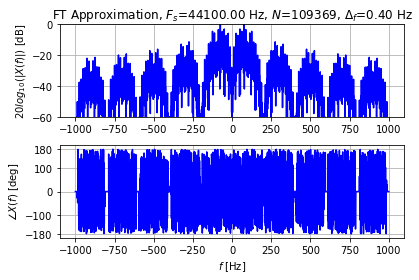

In [44]:
_, _, _ = ModuleLab2.showft(sig_xt, [-1000, 1000, -60])

Vemos pelo espectro que este se trata do sinal especial (que usa $p(t)$ diferente dos dado na introdução), pois temos a componente DC nula.

Ao mesmo tempo, pela aparência do sinal no tempo, sabemos se tratar de algum tipo de pulso baseado em retângulos.

Outro fato interessante é que o sinal não permanece num mesmo nível de amplitude por muito tempo (neste caso, há transições frequentes para que não haja componente DC), o que sugere que o pulso utilizado é algo como o [pulso de Manchester](https://en.wikipedia.org/wiki/Manchester_code).

In [45]:
n0 = 0 # não importa
# novamente, o comprimento é determinado pela quantidade de amostras do sinal CT + determinação de Fb]
len_sig_seq = 8 * 62
stt = np.array(np.round(Fs * (np.arange(0, len_sig_seq) + n0) / Fb), dtype=np.int32) - int(np.ceil(Fs * (n0 - 0.5) / Fb))

Text(0.5, 1.0, "Polar Binary PAM for 'Test', $F_b$ = 200 Baud, Manchester $p(t)$")

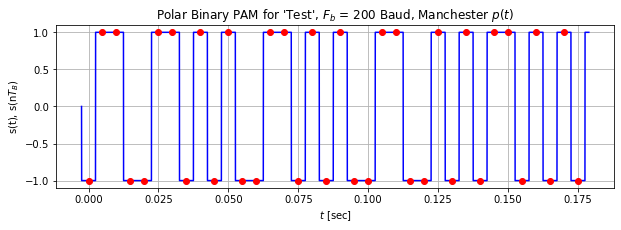

In [46]:
plt.figure(figsize=(10, 3))
sl = slice(0, 8000)
sl2 = slice(0, 8000//220)
plt.plot(sig_xt.timeAxis()[sl], sig_xt.signal()[sl], color = "blue")
plt.plot(sig_xt.timeAxis()[stt][sl2], sig_xt.signal()[stt][sl2], marker = "o", color = "red", linestyle="none")
plt.grid()
plt.xlabel(f"$t$ [sec]")
plt.ylabel(f"s(t), s(n$T_B$)")
plt.title(f"Polar Binary PAM for '{string}', $F_b$ = {Fb} Baud, Manchester $p(t)$")

Text(0, 0.5, 's(t), s(n$T_B$)')

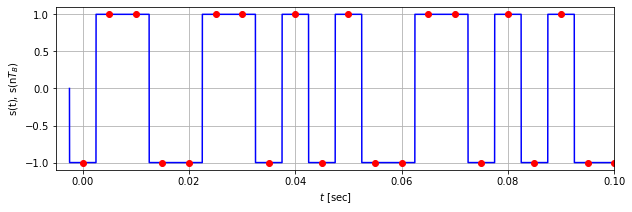

In [47]:
# sl = slice(0, 3000)
plt.figure(figsize=(10, 3))
plt.plot(sig_xt.timeAxis(), sig_xt.signal(), color = "blue")
plt.plot(sig_xt.timeAxis()[stt], sig_xt.signal()[stt], marker = "o", color = "red", linestyle="none")
plt.grid()
plt.xlim([-0.005, 0.1])
plt.xlabel(f"$t$ [sec]")
plt.ylabel(f"s(t), s(n$T_B$)")
# plt.title(f"Polar Binary PAM for '{string}', $F_b$ = {Fb} Baud, Triangular $p(t)$")

In [48]:
dec2 = sig_xt.signal()[stt]
est_bit2 = (dec2 + 1) / 2
est_bit2 = np.round(est_bit2).astype(int)
print(est_bit2)

[0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1
 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0
 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1
 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0
 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0
 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0
 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0
 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1
 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0
 1 0 1 1 0 1 0 0 1 0 1 0 

Pelo funcionamento do pulso de Manchester, vemos que a cada bloco de 2 bits temos: [0, 1] ou [1, 0], portanto amostramos a sequência acima de 2 em 2 amostras (com um offset de 1 amostra).

In [49]:
est_bit2 = est_bit2[1::2]

In [50]:
est_bit2.size / 8

31.0

In [51]:
ModuleLab1.bin2asc(est_bit2, bits = 8, flg = 0)

'Ethernet uses Manchester pulses'

Por fim, o último sinal, que sabemos se tratar do pulso "sinc":

44100


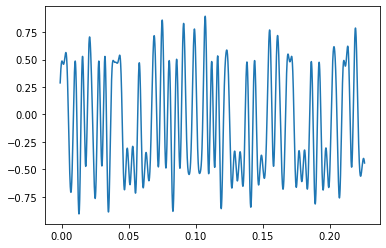

In [52]:
Fs, rt = ModuleLab1.wavread("Files/pamsig203.wav")
Fb = 500
Tb = 1 / Fb
sig_xt = comsig.sigWave(rt, Fs, -Tb / 2)
print(Fs)
sl = slice(0, 10000)
plt.plot(sig_xt.timeAxis()[sl], sig_xt.signal()[sl])

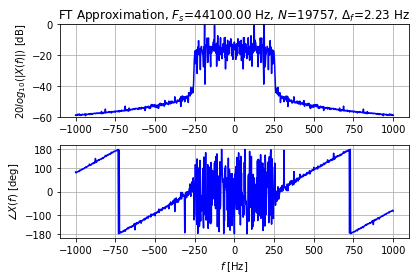

In [53]:
_, _, _ = ModuleLab2.showft(sig_xt, [-1000, 1000, -60])

In [54]:
n0 = 0 # não importa
len_sig_seq = 8 * 28
stt = np.array(np.round(Fs * (np.arange(0, len_sig_seq) + n0) / Fb), dtype=np.int32) - int(np.ceil(Fs * (n0 - 0.5) / Fb))

Text(0.5, 1.0, "Polar Binary PAM for 'Test', $F_b$ = 500 Baud, sinc $p(t)$")

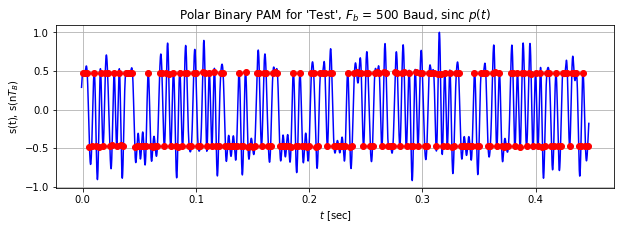

In [55]:
plt.figure(figsize=(10, 3))
plt.plot(sig_xt.timeAxis(), sig_xt.signal(), color = "blue")
plt.plot(sig_xt.timeAxis()[stt], sig_xt.signal()[stt], marker = "o", color = "red", linestyle="none")
plt.grid()
plt.xlabel(f"$t$ [sec]")
plt.ylabel(f"s(t), s(n$T_B$)")
plt.title(f"Polar Binary PAM for '{string}', $F_b$ = {Fb} Baud, sinc $p(t)$")

In [56]:
dec3 = sig_xt.signal()[stt]
est_bit3 = (dec3 + 1) / 2
est_bit3 = np.round(est_bit3).astype(int)
print(est_bit3)

[1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1
 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1
 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1
 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1
 0 0]


In [57]:
ModuleLab1.bin2asc(est_bit3, bits = 8, flg = 0)

"'My life as an online gamer'"

## b

Para este caso, amostramos normalmente como fazemos para o caso de pulso retangular, e depois fazemos a demultiplexação.

44100


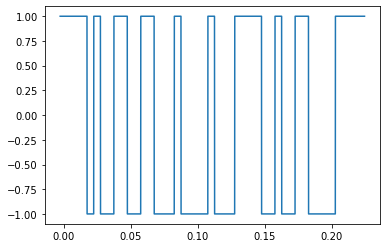

In [58]:
Fs, rt = ModuleLab1.wavread("Files/pamsig204.wav")
Fb = 200
Tb = 1 / Fb
sig_xt = comsig.sigWave(rt, Fs, -Tb / 2)
print(Fs)
sl = slice(0, 10000)
plt.plot(sig_xt.timeAxis()[sl], sig_xt.signal()[sl])

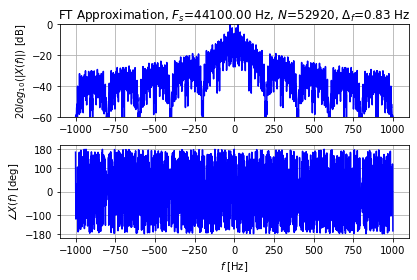

In [59]:
_, _, _ = ModuleLab2.showft(sig_xt, [-1000, 1000, -60])

In [60]:
n0 = 0 # não importa
# novamente, o comprimento é determinado pela quantidade de amostras do sinal CT + determinação de Fb]
len_sig_seq = 8 * 30
stt = np.array(np.round(Fs * (np.arange(0, len_sig_seq) + n0) / Fb), dtype=np.int32) - int(np.ceil(Fs * (n0 - 0.5) / Fb))

In [61]:
stt1 = stt[::2]
stt2 = stt[1::2]

Text(0.5, 1.0, "Polar Binary PAM for 'Test', $F_b$ = 200 Baud, sinc $p(t)$")

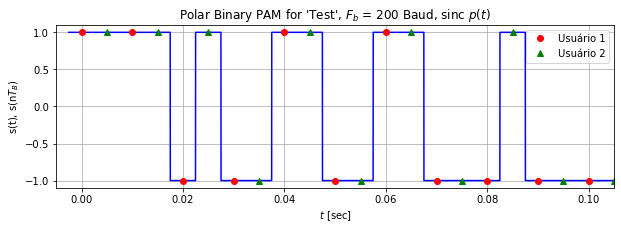

In [62]:
plt.figure(figsize=(10, 3))
plt.plot(sig_xt.timeAxis(), sig_xt.signal(), color = "blue")
plt.plot(sig_xt.timeAxis()[stt1], sig_xt.signal()[stt1], marker = "o", color = "red", linestyle="none", label="Usuário 1")
plt.plot(sig_xt.timeAxis()[stt2], sig_xt.signal()[stt2], marker = "^", color = "green", linestyle="none", label="Usuário 2")
plt.grid()
plt.legend()
plt.xlim([-0.005, 0.105])
plt.xlabel(f"$t$ [sec]")
plt.ylabel(f"s(t), s(n$T_B$)")
plt.title(f"Polar Binary PAM for '{string}', $F_b$ = {Fb} Baud, sinc $p(t)$")

In [63]:
dec4 = sig_xt.signal()[stt]
est_bit4 = (dec4 + 1) / 2
est_bit4 = np.round(est_bit4).astype(int)
print(est_bit4)

[1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1
 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0
 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0
 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1
 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1
 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0]


In [64]:
user1 = np.round((sig_xt.signal()[stt1] + 1) / 2).astype(int)
user2 = np.round((sig_xt.signal()[stt2] + 1) / 2).astype(int)

In [65]:
len(user1), len(user2)

(120, 120)

In [66]:
120 / 8

15.0

Cada usuário transmite 15 caracteres.

Como a mensagem do primeiro usuário possui um caractere a menos que o segundo, utilizou-se padding (utilizando um byte com bits todos nulos, indicado por \x00) para completar a mensagem.

In [67]:
ModuleLab1.bin2asc(user1, bits = 8, flg = 0)

'Shepherd David\x00'

In [68]:
ModuleLab1.bin2asc(user2, bits = 8, flg = 0)

'Warrior Goliath'